
# Clustering words

# AntClust 

Apply AntClust for string data.

## Similarity Clustering

Clustering words based on their similarity as a sequence, using the Levenshtein distance.

In [26]:
import matplotlib.pyplot as plt

def levenshtein_distance(s1, s2):
    # Create a matrix to store distances
    matrix = [[0] * (len(s2) + 1) for _ in range(len(s1) + 1)]

    # Initialize first row and column of the matrix
    for i in range(len(s1) + 1):
        matrix[i][0] = i
    for j in range(len(s2) + 1):
        matrix[0][j] = j

    # Fill the matrix
    for i in range(1, len(s1) + 1):
        for j in range(1, len(s2) + 1):
            cost = 0 if s1[i - 1] == s2[j - 1] else 1
            matrix[i][j] = min(matrix[i - 1][j] + 1,       # Deletion
                               matrix[i][j - 1] + 1,       # Insertion
                               matrix[i - 1][j - 1] + cost)  # Substitution

    # Return the bottom-right cell of the matrix
    return matrix[len(s1)][len(s2)]

# Example usage:

def create_dist_matrix(word_list):
    matrix = [[0] * (len(word_list)) for _ in range(len(word_list))]
    for i in range(0, len(word_list) ):
        for j in range(0, len(word_list)):
           matrix[i][j] =  levenshtein_distance(word_list[i],word_list[j])
    return matrix

words = [
    "book","boot","bool",
    "hello","hallo","hell",
    "rain","train","pain","gain",
    "car","cart","dart","cat","cot"
]

dist_matrix = create_dist_matrix(words)
min_val = min(min(row) for row in dist_matrix)
max_val = max(max(row) for row in dist_matrix)

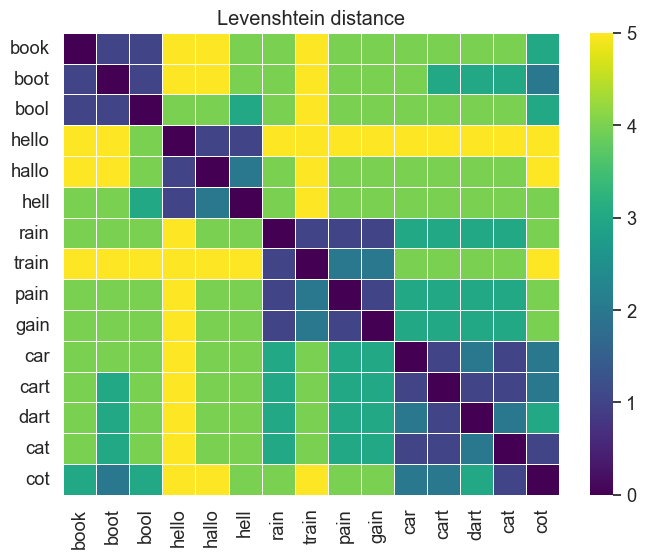

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_heatmap(matrix, row_labels, col_labels):
    sns.set(font_scale=1.2)
    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(matrix, cmap='viridis', fmt=".2f", linewidths=.5, 
                     xticklabels=col_labels, yticklabels=row_labels)
    plt.title('Levenshtein distance')
    plt.show()

plot_heatmap(dist_matrix,words,words)

In [31]:
# ----------------------
#       imports
# ----------------------
# import opencv
import cv2 as cv
# matplotlib
import matplotlib.pyplot as plt

# make AntClus dir known
import sys
sys.path.append("../AntClust")
# import AntClust
from AntClust import AntClust
from importlib import reload

# import the precomputed distance matrix function for AntClust
import distance_classes
reload(distance_classes)# import the rule set
from rules import labroche_rules

# ----------------------
#       AntClust
# ----------------------
# tell AntClust to treat the data set as precomputed similarity matrix
# similarity function
f_sim = [distance_classes.levenshtein_distance(min_val,max_val)]
ant_clust = AntClust(f_sim, labroche_rules())
ant_clust.fit([[i] for i in words])
clusters_found = ant_clust.get_clusters()

AntClust: phase 1 of 3 -> meeting ants
left meetings  1125 / 1125
left meetings  900 / 1125
left meetings  675 / 1125
left meetings  450 / 1125
left meetings  225 / 1125
AntClust: phase 2 of 3 -> shrink nests
AntClust: phase 3 of 3 -> reassign ants


In [32]:
# show clusters
grouped_words = {}
for i in set(clusters_found):
    grouped_words[i] = []
for i in range(len(clusters_found)):
    grouped_words[clusters_found[i]].append(words[i])
for key in grouped_words.keys():
    print(f"Cluster {key}:",grouped_words[key])

Cluster 0: ['book', 'boot', 'bool']
Cluster 1: ['hello', 'hallo', 'hell']
Cluster 2: ['rain', 'train', 'pain', 'gain']
Cluster 3: ['car', 'cart', 'dart', 'cat', 'cot']


### With a more concrete example


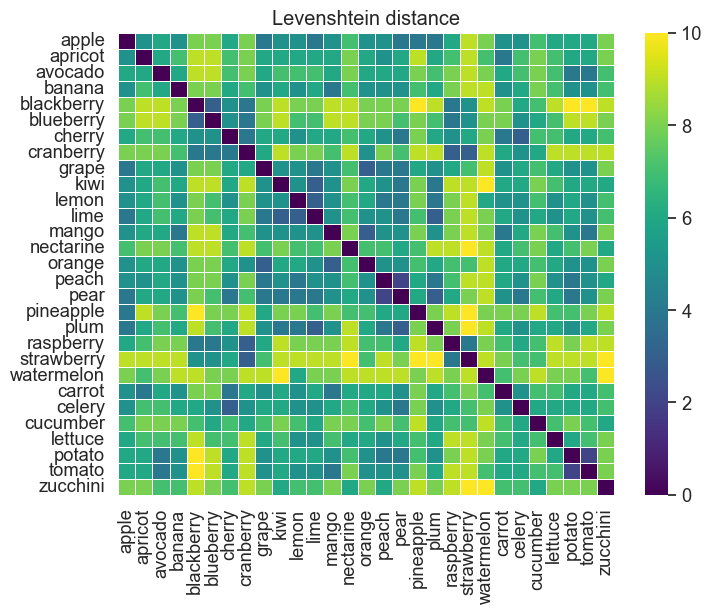

In [30]:
words_list = [
    "apple", "apricot", "avocado", "banana", "blackberry",
    "blueberry", "cherry", "cranberry", "grape", "kiwi",
    "lemon", "lime", "mango", "nectarine", "orange",
    "peach", "pear", "pineapple", "plum", "raspberry",
    "strawberry", "watermelon", "carrot", "celery", "cucumber",
    "lettuce", "potato", "tomato", "zucchini"
]
dist_matrix = create_dist_matrix(words_list)
min_val = min(min(row) for row in dist_matrix)
max_val = max(max(row) for row in dist_matrix)
plot_heatmap(dist_matrix,words_list,words_list)

In [35]:
f_sim = [distance_classes.levenshtein_distance(min_val,max_val)]
ant_clust = AntClust(f_sim, labroche_rules())
ant_clust.fit([[i] for i in words_list])
clusters_found = ant_clust.get_clusters()


AntClust: phase 1 of 3 -> meeting ants
left meetings  2175 / 2175
left meetings  1740 / 2175
left meetings  1305 / 2175
left meetings  870 / 2175
left meetings  435 / 2175
AntClust: phase 2 of 3 -> shrink nests
AntClust: phase 3 of 3 -> reassign ants


In [36]:
grouped_words = {}
for i in set(clusters_found):
    grouped_words[i] = []
for i in range(len(clusters_found)):
    grouped_words[clusters_found[i]].append(words_list[i])
for key in grouped_words.keys():
    print(f"Cluster {key}:",grouped_words[key])

Cluster 0: ['apple', 'grape', 'kiwi', 'lemon', 'lime', 'orange', 'peach', 'pear', 'pineapple', 'plum', 'watermelon', 'lettuce']
Cluster 1: ['apricot', 'banana', 'mango', 'carrot']
Cluster 2: ['avocado', 'potato', 'tomato']
Cluster 3: ['blackberry', 'blueberry', 'cherry', 'cranberry', 'raspberry', 'strawberry', 'celery', 'cucumber']
Cluster 4: ['nectarine', 'zucchini']
